In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
def plot_prediction_error(df_list, label_list, title, ymax, xmax):
    # Theme
    plt.figure(figsize=(16, 8))
    sns.set_theme(style="whitegrid")
    sns.set_context("paper", font_scale=3.5)
    # Data
    for df, label in zip(df_list, label_list):
        ax = sns.lineplot(data=df, x="tau", y="value", label=label, linewidth=3)
    # Axes plot
    ax.set(xlabel="tau", ylabel="NSSE")
    ax.set(ylim=(-0.001, ymax), xlim=(0, xmax))
    ax.legend()
    ax.set_title(title)

In [17]:
def get_df(model, ra):
    df = pd.read_csv("res/2d-lran-ra10000.csv")
    #df = pd.read_csv(f"res/{model}-ra{ra}.csv")
    df["model"] = model
    df["ra"] = ra
    return df

models = ["2d-lran", "2d-fno2d", "2d-fno3d"]
ras = [10000, 30000, 100000, 300000, 1000000, 3000000, 10000000]     

# Prediction Error vs Ra

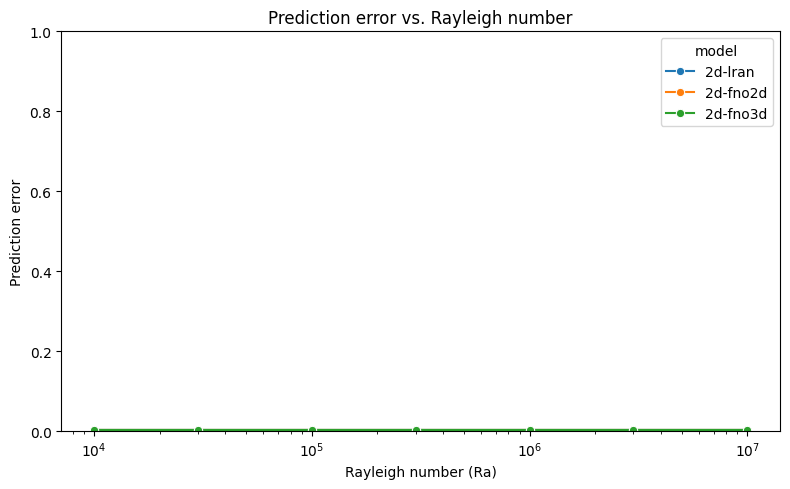

In [19]:
# collect all data into one big DataFrame
df_all = pd.concat([get_df(m, r) for m in models for r in ras], ignore_index=True)

# --- Option A: plot with mean + std shading ---
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df_all,
    x="ra",
    y="value",      # prediction error column
    hue="model",
    marker="o",
    estimator="mean",  # mean error across samples/steps
    errorbar="sd",     # shaded std deviation
)
plt.xscale("log")
plt.xlabel("Rayleigh number (Ra)")
plt.ylabel("Prediction error")
plt.ylim(0, 1)
plt.title("Prediction error vs. Rayleigh number")
#plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

# Prediction Error vs Time in Sequence

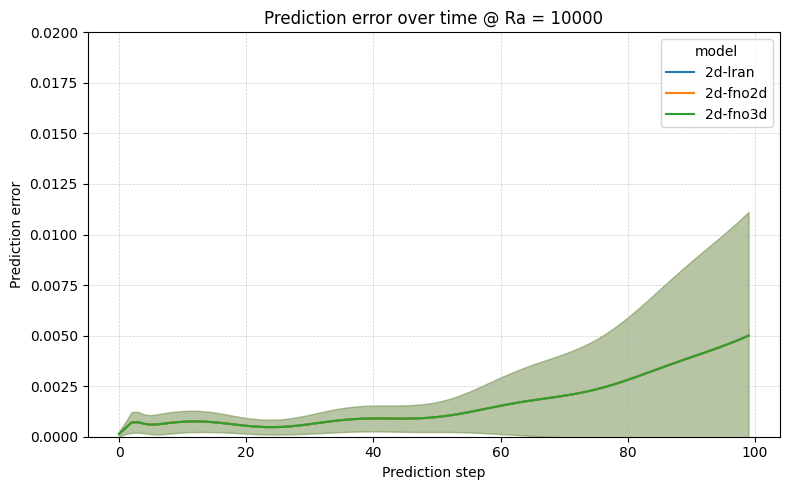

In [24]:
def plot_error_over_time(df_all: pd.DataFrame, ra_sel: int | float):
    df_ra = df_all[df_all["ra"] == ra_sel].copy()
    # (Optional) ensure steps are sorted
    df_ra = df_ra.sort_values("step")

    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=df_ra,
        x="step",
        y="value",
        hue="model",
        estimator="mean",   # mean across idx/batch/sample
        errorbar="sd",      # shaded std per step (use ("ci",95) for CI)
    )
    plt.xlabel("Prediction step")
    plt.ylabel("Prediction error")
    plt.ylim(0, 0.02)
    plt.title(f"Prediction error over time @ Ra = {ra_sel}")
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example:
plot_error_over_time(df_all, ra_sel=10000)